Accuracy Score: 0.53
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.49      0.52       156
           1       0.51      0.57      0.54       144

    accuracy                           0.53       300
   macro avg       0.53      0.53      0.53       300
weighted avg       0.53      0.53      0.53       300



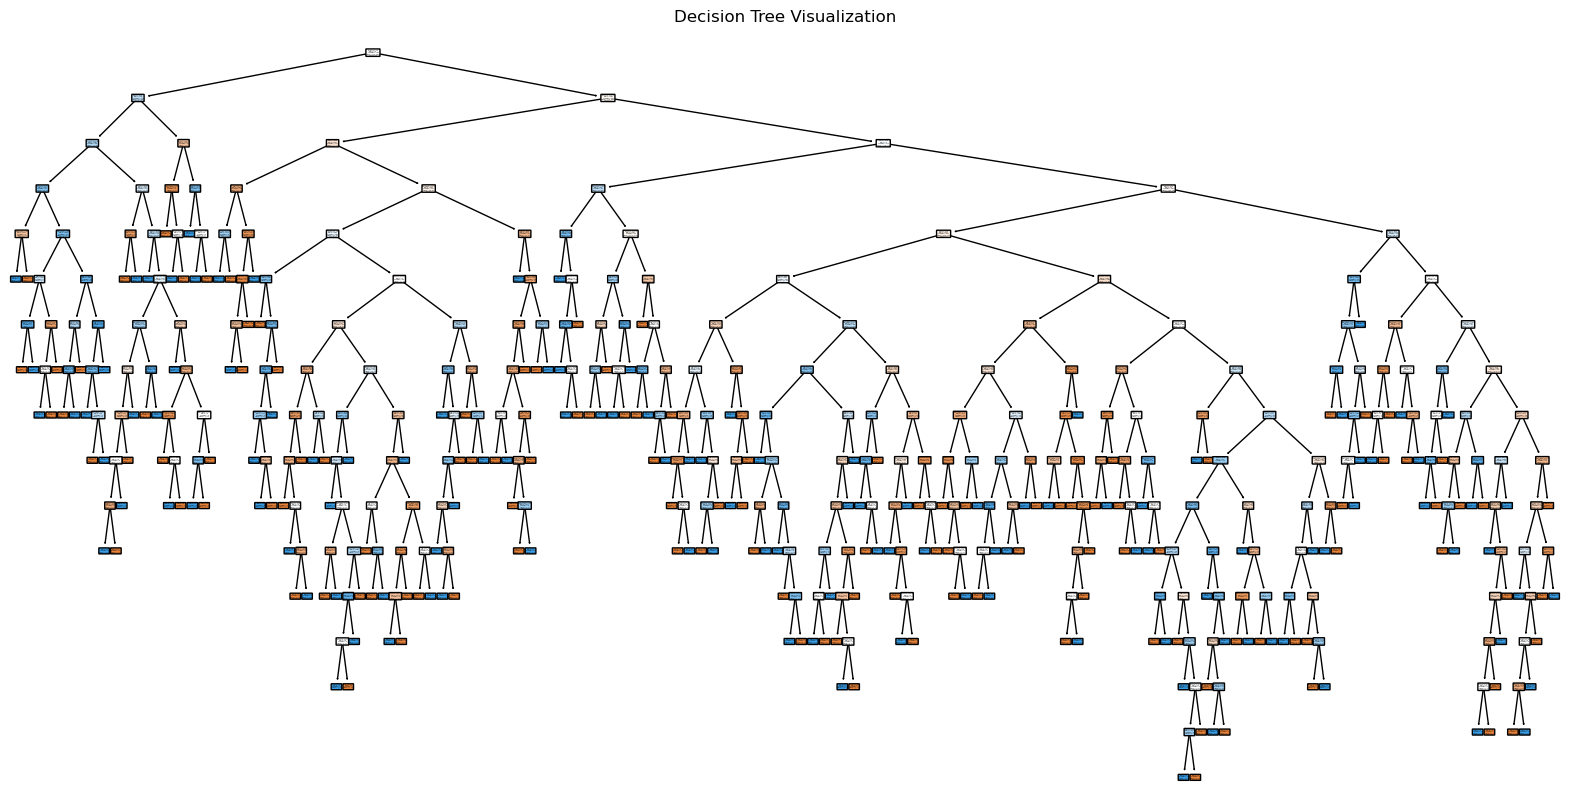

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

np.random.seed(42)

n_samples = 1000
data = {
    'age': np.random.randint(18, 70, size=n_samples),
    'job': np.random.choice(['admin', 'blue-collar', 'student', 'retired'], size=n_samples),
    'marital': np.random.choice(['married', 'single', 'divorced'], size=n_samples),
    'education': np.random.choice(['primary', 'secondary', 'tertiary'], size=n_samples),
    'previous': np.random.randint(0, 10, size=n_samples),
    'contact': np.random.choice(['cellular', 'telephone'], size=n_samples),
    'month': np.random.choice(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], size=n_samples),
    'poutcome': np.random.choice(['success', 'failure', 'nonexistent'], size=n_samples),
    'y': np.random.choice([0, 1], size=n_samples)
}

df = pd.DataFrame(data)

for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['no', 'yes'], rounded=True)
plt.title("Decision Tree Visualization")
plt.show()